The last section of this tutorial is about producing annotated tree figures and a human readable report. First we have to load our `Project` again:

In [1]:
from reprophylo import *
pj = unpickle_pj('outputs/my_project.pkpj', git=False)

DEBUG:Cloud:Log file (/home/amir/.picloud/cloud.log) opened


## 3.10.1 Updating the metadata after the tree has been built

Often, we want to display information that did not exist in the `Project` when we first built our trees. This is not an issue. We can add  metadata now and propagate it to all the parts of the `Project`, including to our preexisting trees. For example, I add here some morphological information. Some of the species in our data have a morphological structure called porocalyx,

In [ ]:
genera_with_porocalices = ['Cinachyrella', 
                           'Cinachyra', 
                           'Amphitethya',
                           'Fangophilina',
                           'Acanthotetilla',
                           'Paratetilla']

while others do not:

In [ ]:
genera_without_porocalices = ['Craniella',
                              'Tetilla',
                              'Astrophorida']

The following command will add the value `'present'` to a new qualifier called `'porocalices'` in sequence features of species that belong to `genera_with_porocalices`:

In [ ]:
for genus in genera_with_porocalices:
    pj.if_this_then_that(genus, 'genus', 'present', 'porocalices')

and the following command will add the value `'absent'` to a new qualifier called `'porocalices'` to sequence features of species that belong to `genera_without_porocalices`:

In [2]:
for genus in genera_without_porocalices:
    pj.if_this_then_that(genus, 'genus', 'absent', 'porocalices')

The new qualifier `porocalices` in now updated in the `SeqRecord` objects within the `pj.records` list (more on this in section 3.4). But in order for it to exist in the `Tree` objects, stored in the `pj.trees` dictionary, we have to run this command:

In [3]:
pj.propagate_metadata()

Only now the new qualifier is available for tree annotation. Note that qualifiers that existed in the `Project` when we built the trees, will be included in the `Tree` object by default. 

## 3.10.2 Configuring and writing a tree figure

The `annotate` `Project` method will produce one figure for each tree in the `Project` according to the settings. Colors can be indicated with [X11 color names](https://en.wikipedia.org/wiki/Web_colors#X11_color_names). The following settings can be controlled:

1. **`fig_folder`**: The path for the output figure file
2. **`root_meta`** and **`root_value`**: The qualifier and its value that will indicate the outgroup. It can be `'mid'` and `'mid'` for a midpoint root, or for example, `'source_organism'` and `'Some species binomial'` to set a group of leaves with a shared value as an outgroup (required).
3. **`leaf_labels_txt_meta`**: A list of qualifiers which values will be used as leaf labels, required.
4. **`leaf_node_color_meta`** and **`leaf_label_colors`**: The qualifier that determines clade background colors and a dictionary assigning colors to the qualifier's values (defaults to None and None).
5. **`ftype`** and **`fsize`**: Leaf label font and font size (default 'verdana' and 10)
6. **`node_bg_meta`** and **`node_bg_color`**: A qualifier that determines the leaf label colors and a dictionary assigning colors to its values (defaults to None and None).
7. **`node_support_dict`** and **`support_bullet_size`**: A dictionary assigning support ranges to bullet colors, and the size of the bullets (defaults to None and 5),
8. **`heat_map_meta`** and **`heat_map_colour_scheme`**: A list of qualifiers which will be the heatmap's columns, and the color scheme (defaults to None and 2 see ETE for color schemes)
9. **`pic_meta`**, **`pic_paths`**, **`pic_w`** and **`pic_h`**: You can put small images next to leaves. `pic_meta` will determine the qualifier according to which values an image will be assigned. `pic_paths` is a dictionary assigning image file paths to the qualifier's values. `pic_w` and `pic_h` are the dimensions of the images in pixels (the defaults are None for all the four keywords).  
10. **`multifurc`**: Branch support cutoff under which to multifurcate nodes (default - None).
11. **`branch_width`** and **`branch_color`** (defaults: `2` and `DimGray`)
12. **`scale`**: This will determine the width of the tree (default 1000)
13. **`html`**: The path to which to write an html file with a list of the figures and links to the figure files (default None)

### 3.10.2.1 Example 1, the metadata determines background colours

In [4]:
bg_colors = {'present':'red',
             'absent': 'white'}

supports = {'black': [100,99],
            'gray': [99,80]}

pj.annotate('./images/',               # Path to write figs to
            
            'genus', 'Astrophorida',   # Set OTUs that have 'Astrophorida'
                                       # in their 'genus' qualifier
                                       # as outgroup
            
            ['source_organism', 'record_id'], # leaf labels
            
            node_bg_meta='porocalices', # The qualifier that
                                        # will determine bg colors
            node_bg_color=bg_colors,    # The colors assigned to 
                                        # each qualifier value
            
            node_support_dict=supports, 
            
            html='./images/figs.html'
           )

pj.clear_tree_annotations()

In the resulting figure (below), clades of species with porocalices have red background, node with maximal relBootstrap support have black bullets, and nodes with branch support > 80 has gray bullets.

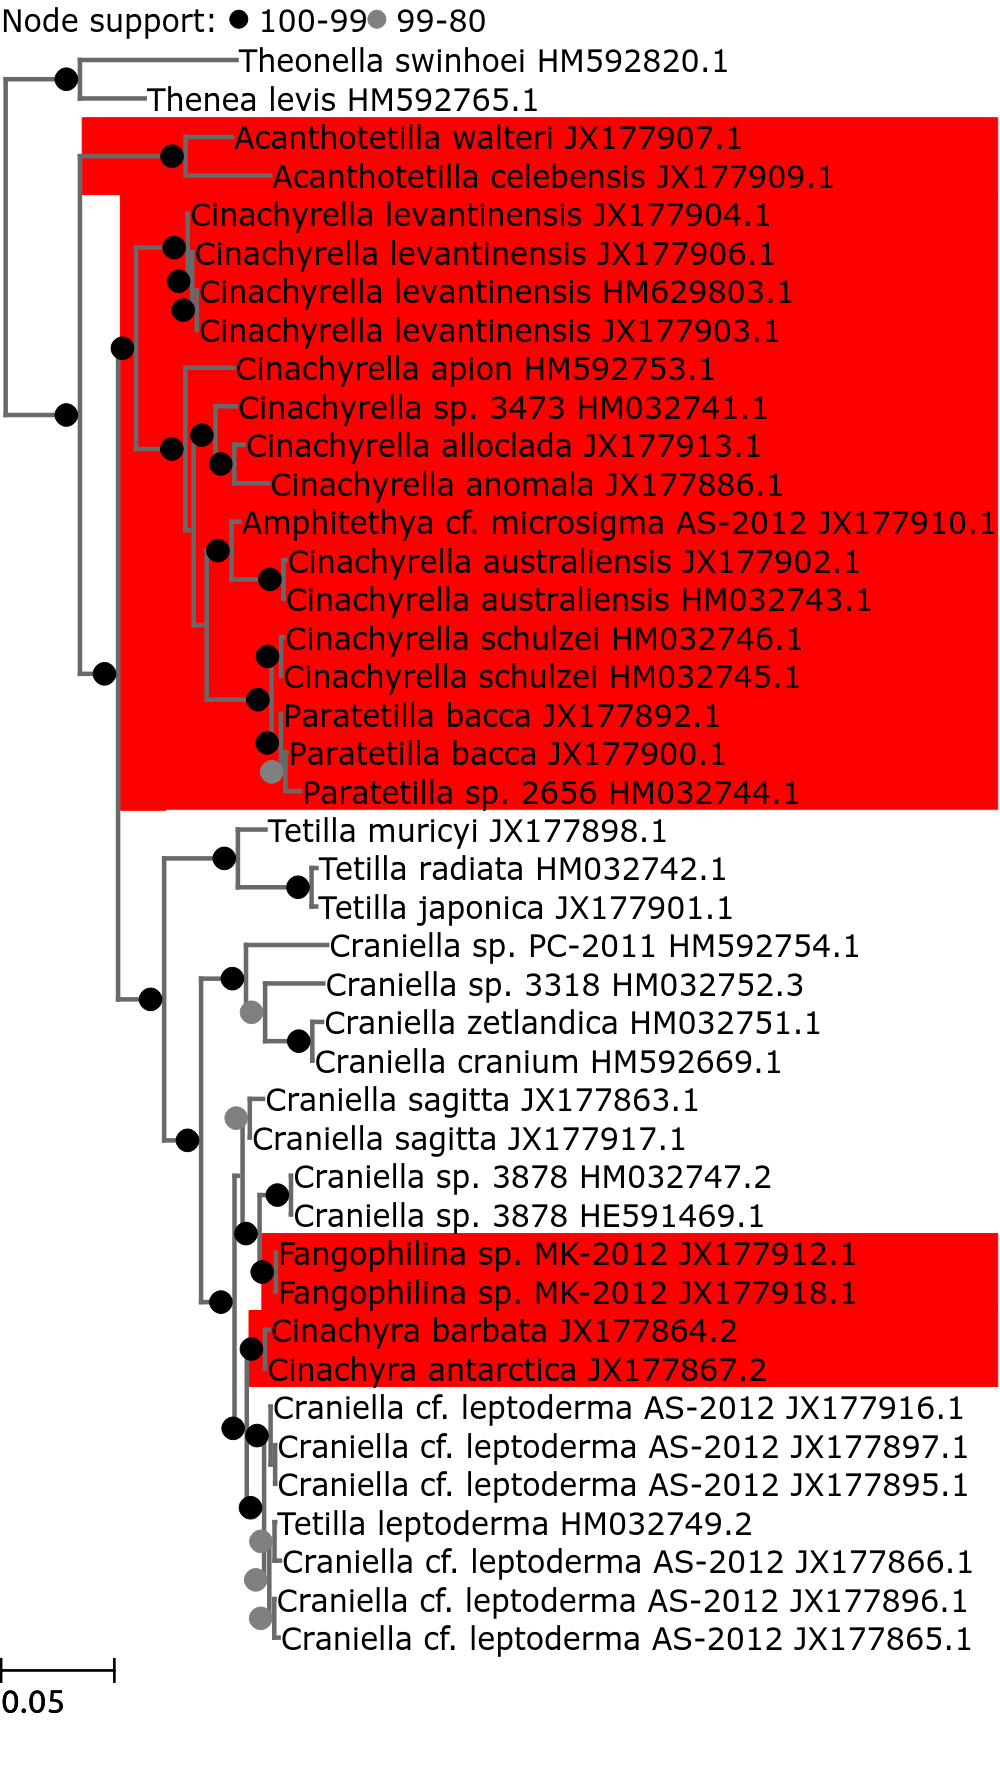

In [5]:
from IPython.display import Image
Image('./images/example1.png', width=300)

### 3.10.2.2 Example 2, the metadata as a heatmap
The second example introduces midpoint rooting and a heatmap. There are three columns in this heatmap, representing numerical values of three qualifiers. In this instance, the values are 0 or 1 for presence and absence. In addition, we change the branch colour to black and assign shades of gray to the genera.  

In [6]:
bg_colors = {'Cinachyrella': 'gray', 
             'Cinachyra': 'silver', 
             'Amphitethya': 'white',
             'Fangophilina':'white',
             'Acanthotetilla':'silver',
             'Paratetilla':'white',
             'Craniella': 'gray',
             'Tetilla': 'silver',
             'Astrophorida': 'white'}

pj.clear_tree_annotations()

pj.annotate('./images/',               # Path to write figs to
            
            'mid', 'mid',              # Set midpoint root
            
            ['source_organism'],        # leaf labels
            
            fsize=13,
            
            node_bg_meta='genus',       # The qualifier that
                                        # will determine bg colors
            node_bg_color=bg_colors,    # The colors assigned to 
                                        # each qualifier value
            
            # heatmap columns
            heat_map_meta=['porocalyx', 'cortex', 'calthrops'],
            
            heat_map_colour_scheme=0,
            
            branch_color='black',
 
            html='./images/figs.html'
           )

And this is what it looks like:

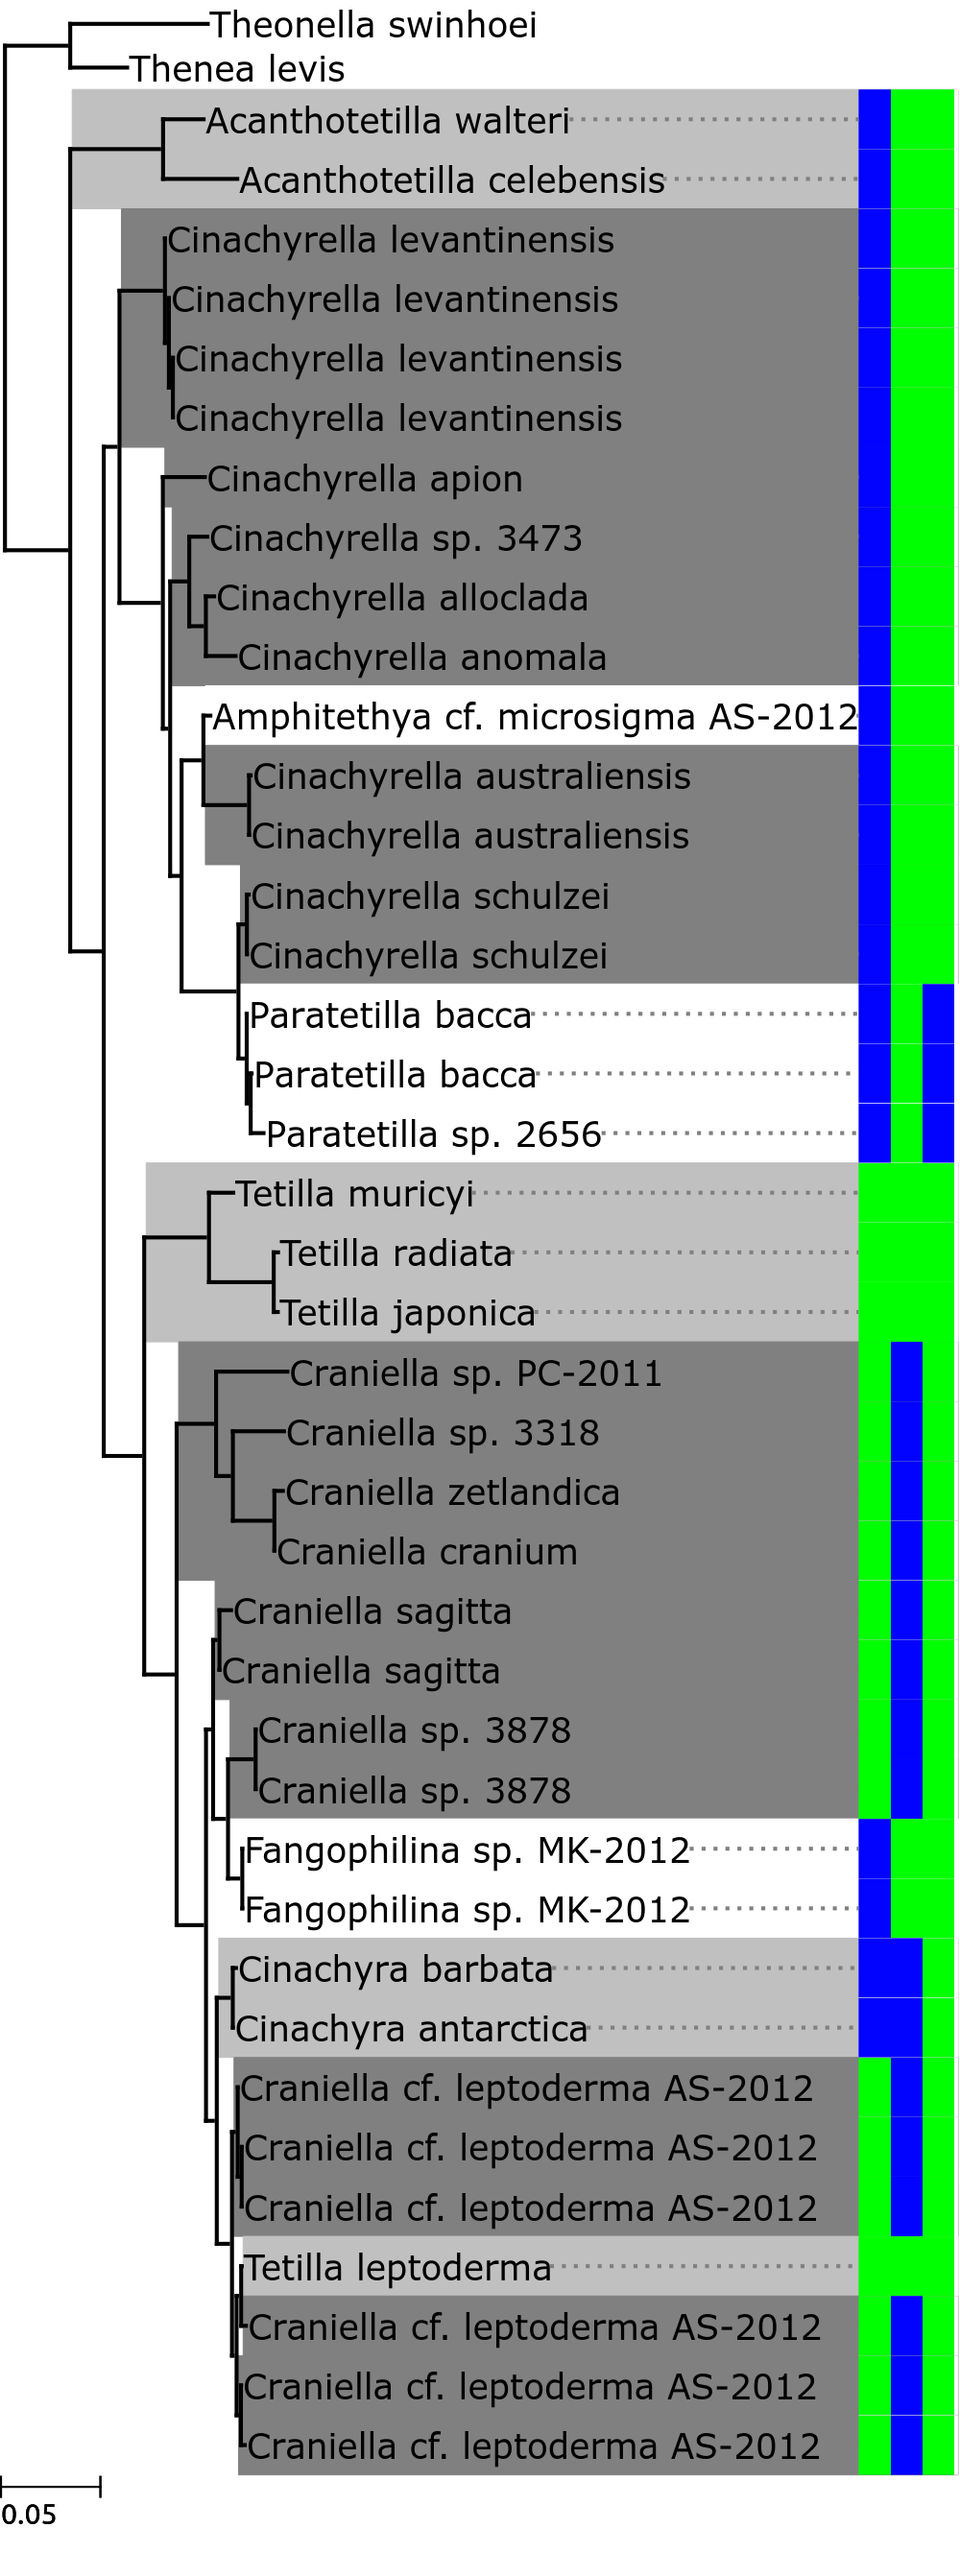

In [7]:
from IPython.display import Image
Image('./images/example2.png', width=300)

## 2.10.3 Archive the analysis as a zip file
The `publish` function will produce an html human readable report containing a description of the data, alignments, trees, and the methods that created them in various ways. The following options control this function:  
  
1. **`folder_name`**: zip file name or directory name for the report (will be created)
2. **`figures_folder`**: where did you save your tree figures?
3. **`size`**: `'small'` = don't print alignment statistics graph, or `'large'`: print them. If `'large'` is chosen, for each alignment and trimmed alignment, gap scores and conservation scores plots will be printed. (default - `'small'`). 
4. **`compare_trees`**: a list of algorithms to use to formally compare trees. The algorithms to choose from are `'topology'`, `'branch-length'` and `'proportional'`. (default, [])
5. **`compare_meta`**: Similar to the OTU qualifier required for data concatenation, we need to say which qualifier identifies a discrete sample, that will allow to compare trees of different genes. By default, it will look for a `Concatenation` object and will use the OTU meta that is specified there. If there are no `Concatenation` objects, and we have not specified a `compare_meta`, it will raise an error.  
6. **`trees_to_compare`**: A list of keys from the `pj.trees` dictionary. This allows to control what trees will go into the pairwise comparisons and also control their order of appearance in the results. (default, `'all'`) 
7. **`unrooted_trees`**: `True` or `False` (default). If True, the algorithm will minimize the difference before determining it.

This is a minimal example, which does not include tree comparisons. Tree comparisons are shown later.

In [8]:
publish(pj, 'my_report', './images/', size='large')

checking if file exists
reporter was called by publish
starting species table
starting sequence statistics plots
starting concatenations
starting methods
starting alignment statistics
starting RF matrix(ces)
reporting trees
pickling
archiving
report ready


/usr/local/lib/python2.7/dist-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


In [9]:
pickle_pj(pj, 'outputs/my_project.pkpj')

'outputs/my_project.pkpj'